# Data Cleaning and Data Wrangling

In [1]:
#Importing Required Librariries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Retriving Raw Data
airbnb_rawdata = pd.read_csv('Air_BnB.csv')

C:\Users\PRANAV\AppData\Local\Temp\ipykernel_10624\509120022.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_rawdata = pd.read_csv('Air_BnB.csv')


<H3>Droping Unwanted Coloumn</H3>

In [3]:
#Removing Unwanted Coloumn
column_to_drop = ['NAME','host id','host name', 'lat', 'long', 'country','country code',
                  'calculated host listings count','house_rules', 'license', 'number of reviews',
                  'reviews per month','last review']
airbnb_rawdata.drop(column_to_drop, axis=1, inplace=True)

In [4]:
#Checking info of the Dataframe to see number of records in each coloumn
airbnb_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102599 non-null  int64  
 1   host_identity_verified  102310 non-null  object 
 2   neighbourhood group     102570 non-null  object 
 3   neighbourhood           102583 non-null  object 
 4   instant_bookable        102494 non-null  object 
 5   cancellation_policy     102523 non-null  object 
 6   room type               102599 non-null  object 
 7   Construction year       102385 non-null  float64
 8   Price                   102352 non-null  object 
 9   Service Fee             102328 non-null  object 
 10  minimum nights          102190 non-null  float64
 11  review rate number      102273 non-null  float64
 12  availability 365        102151 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 10.2+ MB


<H3>Handle Null Values</H3>

In [5]:
#Deleting records with NaN values for those variables we can predict or assume the values. 
airbnb_rawdata.dropna(subset=['neighbourhood', 'instant_bookable', 'cancellation_policy',
                              'Construction year', 'Price', 'review rate number', 'availability 365']
                      , inplace=True)

In [6]:
#Replacing NaN values with the relevent values
airbnb_rawdata['host_identity_verified'].fillna('unconfirmed', inplace = True)
airbnb_rawdata['Service Fee'].fillna(0.0, inplace = True)
airbnb_rawdata['minimum nights'].fillna(1, inplace = True)

#According to the relationship with neighbour group to the neighbourhood, 
#sorted by neighbourhood and neighbourhood group and then done forward fill to handle missing values 
airbnb_rawdata.sort_values(by=['neighbourhood','neighbourhood group'], inplace=True)
airbnb_rawdata['neighbourhood group'].fillna(method = 'ffill', inplace = True)

In [7]:
#Checking if still any null values are there
airbnb_rawdata.isnull().sum()

id                        0
host_identity_verified    0
neighbourhood group       0
neighbourhood             0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
Price                     0
Service Fee               0
minimum nights            0
review rate number        0
availability 365          0
dtype: int64

In [8]:
#Checking info of the Dataframe to see number of records in each coloumn
airbnb_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101324 entries, 1168 to 102415
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      101324 non-null  int64  
 1   host_identity_verified  101324 non-null  object 
 2   neighbourhood group     101324 non-null  object 
 3   neighbourhood           101324 non-null  object 
 4   instant_bookable        101324 non-null  object 
 5   cancellation_policy     101324 non-null  object 
 6   room type               101324 non-null  object 
 7   Construction year       101324 non-null  float64
 8   Price                   101324 non-null  object 
 9   Service Fee             101324 non-null  object 
 10  minimum nights          101324 non-null  float64
 11  review rate number      101324 non-null  float64
 12  availability 365        101324 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 10.8+ MB


<H3>Removing Duplicates</H3>

In [9]:
#remove Duplicate
airbnb_rawdata.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

In [10]:
#Checking info of the Dataframe to see number of records in each coloumn
airbnb_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101324 entries, 0 to 101323
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      101324 non-null  int64  
 1   host_identity_verified  101324 non-null  object 
 2   neighbourhood group     101324 non-null  object 
 3   neighbourhood           101324 non-null  object 
 4   instant_bookable        101324 non-null  object 
 5   cancellation_policy     101324 non-null  object 
 6   room type               101324 non-null  object 
 7   Construction year       101324 non-null  float64
 8   Price                   101324 non-null  object 
 9   Service Fee             101324 non-null  object 
 10  minimum nights          101324 non-null  float64
 11  review rate number      101324 non-null  float64
 12  availability 365        101324 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 10.0+ MB


By comparing previous and new data, there is no duplicates records in our dataframe

<H3>Data Transformation</H3>

In [11]:
#Removing "$" symbol, whitespace and "," symbol from Price and Service Fee column
airbnb_rawdata['Price'] = airbnb_rawdata['Price'].str[1:].str.strip().str.replace(",", "")
airbnb_rawdata['Service Fee'] = airbnb_rawdata['Service Fee'].str[1:].str.strip().str.replace(",", "")

In [12]:
#We observe that there is spelling mistake in Brooklyn for one record
airbnb_rawdata.groupby('neighbourhood group')['id'].count()

neighbourhood group
Bronx             2669
Brooklyn         41323
Manhattan        43275
Queens           13113
Staten Island      943
brookln              1
Name: id, dtype: int64

In [13]:
#replacing brookln with Brooklyn
airbnb_rawdata.replace(to_replace='brookln', value='Brooklyn',inplace=True)

In [14]:
#Converting datatype of price and service fee column from object to numeric
airbnb_rawdata["Price"] = pd.to_numeric(airbnb_rawdata["Price"])
airbnb_rawdata["Service Fee"] = pd.to_numeric(airbnb_rawdata["Service Fee"])

#Converting datatype of minimum night, review rate number, Construction year and availability 365 from float to int
airbnb_rawdata['minimum nights'] = airbnb_rawdata['minimum nights'].astype(int)
airbnb_rawdata['review rate number'] = airbnb_rawdata['review rate number'].astype(int)
airbnb_rawdata['Construction year'] = airbnb_rawdata['Construction year'].astype(int)
airbnb_rawdata['availability 365'] = airbnb_rawdata['availability 365'].astype(int)
airbnb_rawdata['Service Fee'].fillna(0.0, inplace = True)

In [15]:
#Checking info to see datatypes of each columns after updating
airbnb_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101324 entries, 0 to 101323
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      101324 non-null  int64  
 1   host_identity_verified  101324 non-null  object 
 2   neighbourhood group     101324 non-null  object 
 3   neighbourhood           101324 non-null  object 
 4   instant_bookable        101324 non-null  bool   
 5   cancellation_policy     101324 non-null  object 
 6   room type               101324 non-null  object 
 7   Construction year       101324 non-null  int32  
 8   Price                   101324 non-null  int64  
 9   Service Fee             101324 non-null  float64
 10  minimum nights          101324 non-null  int32  
 11  review rate number      101324 non-null  int32  
 12  availability 365        101324 non-null  int32  
dtypes: bool(1), float64(1), int32(4), int64(2), object(5)
memory usage: 7.8+ M

In [16]:
#Filtering only positive values from minimun nights
airbnb_rawdata = airbnb_rawdata[(airbnb_rawdata["minimum nights"]>0)]
airbnb_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101312 entries, 0 to 101323
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      101312 non-null  int64  
 1   host_identity_verified  101312 non-null  object 
 2   neighbourhood group     101312 non-null  object 
 3   neighbourhood           101312 non-null  object 
 4   instant_bookable        101312 non-null  bool   
 5   cancellation_policy     101312 non-null  object 
 6   room type               101312 non-null  object 
 7   Construction year       101312 non-null  int32  
 8   Price                   101312 non-null  int64  
 9   Service Fee             101312 non-null  float64
 10  minimum nights          101312 non-null  int32  
 11  review rate number      101312 non-null  int32  
 12  availability 365        101312 non-null  int32  
dtypes: bool(1), float64(1), int32(4), int64(2), object(5)
memory usage: 8.6+ M

<H3>Creating New Variable</H3>

In [17]:
#Creating new variable Total_price
airbnb_rawdata = airbnb_rawdata.assign(total_price = airbnb_rawdata['Price'] + airbnb_rawdata['Service Fee'])
airbnb_rawdata.head()

id host_identity_verified neighbourhood group neighbourhood  \
0  1646422               verified               Bronx      Allerton   
1  1873418            unconfirmed               Bronx      Allerton   
2  1922020            unconfirmed               Bronx      Allerton   
3  1944112            unconfirmed               Bronx      Allerton   
4  3650167               verified               Bronx      Allerton   

   instant_bookable cancellation_policy        room type  Construction year  \
0             False            flexible     Private room               2022   
1             False              strict     Private room               2003   
2             False            flexible  Entire home/apt               2016   
3             False              strict     Private room               2012   
4             False            flexible     Private room               2021   

   Price  Service Fee  minimum nights  review rate number  availability 365  \
0    100         20.0               7                   5               165   
1   1161        232.0               2                   1               359   
2    544        108.0               2                   2               393   
3    958        192.0               1                   4               313   
4    614        123.0               2                   1               266   

   total_price  
0        120.0  
1       1393.0  
2        652.0  
3       1150.0  
4        737.0

In [18]:
#Creating new variable Price_range

# Define labels for price ranges
labels = ['Economy', 'Premium', 'Luxury']

# Define bins for price classes
cut_points = [0, 500, 1000, 1500]

airbnb_rawdata = airbnb_rawdata.assign(price_class = pd.cut(airbnb_rawdata['total_price'],
                                                            bins=cut_points, labels=labels, right=False))

In [19]:
#Final Dataset
airbnb_final_data = airbnb_rawdata
airbnb_final_data.head()

id host_identity_verified neighbourhood group neighbourhood  \
0  1646422               verified               Bronx      Allerton   
1  1873418            unconfirmed               Bronx      Allerton   
2  1922020            unconfirmed               Bronx      Allerton   
3  1944112            unconfirmed               Bronx      Allerton   
4  3650167               verified               Bronx      Allerton   

   instant_bookable cancellation_policy        room type  Construction year  \
0             False            flexible     Private room               2022   
1             False              strict     Private room               2003   
2             False            flexible  Entire home/apt               2016   
3             False              strict     Private room               2012   
4             False            flexible     Private room               2021   

   Price  Service Fee  minimum nights  review rate number  availability 365  \
0    100         20.0               7                   5               165   
1   1161        232.0               2                   1               359   
2    544        108.0               2                   2               393   
3    958        192.0               1                   4               313   
4    614        123.0               2                   1               266   

   total_price price_class  
0        120.0     Economy  
1       1393.0      Luxury  
2        652.0     Premium  
3       1150.0      Luxury  
4        737.0     Premium

In [20]:
airbnb_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101312 entries, 0 to 101323
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      101312 non-null  int64   
 1   host_identity_verified  101312 non-null  object  
 2   neighbourhood group     101312 non-null  object  
 3   neighbourhood           101312 non-null  object  
 4   instant_bookable        101312 non-null  bool    
 5   cancellation_policy     101312 non-null  object  
 6   room type               101312 non-null  object  
 7   Construction year       101312 non-null  int32   
 8   Price                   101312 non-null  int64   
 9   Service Fee             101312 non-null  float64 
 10  minimum nights          101312 non-null  int32   
 11  review rate number      101312 non-null  int32   
 12  availability 365        101312 non-null  int32   
 13  total_price             101312 non-null  float64 
 14  pric

# Predictive Modelling

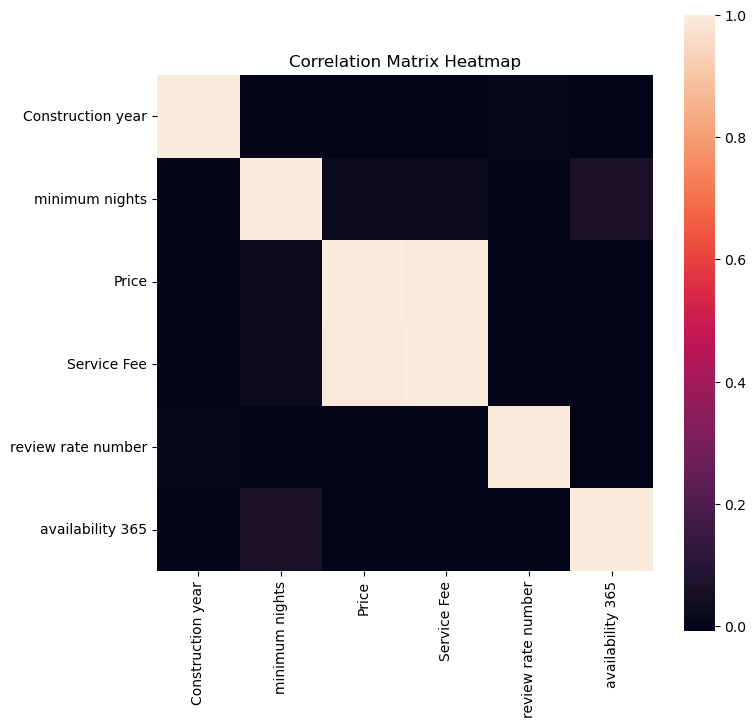

In [21]:
#Correlation Heatmap
LR_test = airbnb_final_data.filter(['Construction year', 'minimum nights', 'Price', 
                                    'Service Fee', 'review rate number', 'availability 365'])

plt.figure(figsize=(8, 8))
sns.heatmap(LR_test.corr(), square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Since There is no strong correlation between any variable, hence we can not apply linear regression here therefore we are going with Decsion Tree Classification

In [22]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import plot_tree

In [23]:
#Model1 - Decision Tree

#Separate Predictor and Response variable
Predictor = airbnb_final_data.filter(['host_identity_verified', 'neighbourhood group', 'neighbourhood', 
                                    'instant_bookable', 'cancellation_policy', 'room type', 
                              'Construction year', 'minimum nights', 'review rate number']) 
Response = airbnb_final_data['price_class']

#Split the dataset into training and testing sets
Predictor_train, Predictor_test, Response_train, Response_test = train_test_split(Predictor, Response, 
                                                                                  test_size=0.3, random_state=42)

#Encoding the data since they are categorical
Predictor_train_encoded = pd.get_dummies(Predictor_train)
Predictor_test_encoded = pd.get_dummies(Predictor_test)

Predictor_test_encoded = Predictor_test_encoded.reindex(columns=Predictor_train_encoded.columns, fill_value=0)

#Create a Decision Tree classifier with max depth 4
Price_classifier = DecisionTreeClassifier(max_depth = 4)

#Train the classifier on the training data
Price_classifier.fit(Predictor_train_encoded, Response_train)

#Make predictions on the testing data
Response_pred = Price_classifier.predict(Predictor_test_encoded)

#Checking the accuracy of the model
accuracy = accuracy_score(Response_test, Response_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.47683753372376125


In [24]:
#Model1 - Naive Bayes

#Separate Predictor and Response variable
PredictorN = airbnb_final_data.filter(['host_identity_verified', 'neighbourhood group', 'neighbourhood', 
                                    'instant_bookable', 'cancellation_policy', 'room type', 
                                    'Construction year', 'minimum nights', 'review rate number']) 
ResponseN = airbnb_final_data['price_class']

#Encoding the data since they are categorical
le = LabelEncoder()
Predictor_encodedN = PredictorN.apply(le.fit_transform)

#Split the dataset into training and testing sets
Predictor_trainN, Predictor_testN, Response_trainN, Response_testN = train_test_split(Predictor_encodedN, 
                                                                                      ResponseN, test_size=0.3,
                                                                                      random_state=42)

#Create a Naive Bayes classifier
Price_classifierN = MultinomialNB()

#Train the classifier on the training data
Price_classifierN.fit(Predictor_trainN, Response_trainN)

#Make predictions on the testing data
Response_predN = Price_classifierN.predict(Predictor_testN)

#Checking the accuracy of the model
accuracyN = accuracy_score(Response_testN, Response_predN)
print(f"Accuracy: {accuracyN}")


Accuracy: 0.45255642561031784


In [25]:
# Visualize the Decision Tree
plt.figure(figsize=(200, 200))
plot_tree(Price_classifier, filled=True, feature_names=Predictor_train_encoded.columns, class_names=True, rounded=True)

plt.show()

In [26]:
#Making Prediction

#Creating Prediction dataframe
prediction_data = pd.DataFrame({
    'host_identity_verified': ['unconfirmed'],
    'neighbourhood group': ['Manhattan'],
    'neighbourhood': ['Murray Hill'],
    'instant_bookable': ['TRUE'],
    'cancellation_policy': ['strict'],
    'room type': ['Shared room'],
    'Construction year': [2018],
    'minimum nights': [2],
    'review rate number': [5]
})

# Encode the dataframe to convert categorical to numerical
prediction_data_encoded = pd.get_dummies(prediction_data)
prediction_data_encoded = prediction_data_encoded.reindex(columns=Predictor_train_encoded.columns, fill_value=0)

# Make predictions using the trained model
prediction_data_predictions = Price_classifier.predict(prediction_data_encoded)

print("Predictions for new data:")
print(prediction_data_predictions)

Predictions for new data:
['Economy']
